In [40]:
import pandas as pd
import numpy as np


Loaded shape: (1095112, 5)


,product_id,product_name_product,primary_category,secondary_category,rating_review
0,P504322,Gentle Hydra-Gel Face Cleanser,Skincare,Cleansers,5.0
1,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Skincare,Lip Balms & Treatments,1.0
2,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Skincare,Lip Balms & Treatments,5.0
3,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Skincare,Lip Balms & Treatments,5.0
4,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Skincare,Lip Balms & Treatments,5.0


In [41]:
cols = [
    "product_id",
    "product_name_product",
    "primary_category",
    "secondary_category",
    "rating_review"
]


Missing rating values: 701


In [42]:
merged = pd.read_csv(
    "merged_clean.csv",
    usecols=cols,
    engine="python",
    on_bad_lines="skip"
)


After dropping missing ratings: (1094411, 5)


In [43]:
print("Loaded shape:", merged.shape)
merged.head()


Loaded shape: (1094411, 5)
Missing rating values now: 0


In [44]:
merged["rating_review"] = pd.to_numeric(merged["rating_review"], errors="coerce")
print("Missing rating values:", merged["rating_review"].isna().sum())


Missing rating values: 0


primary_category
Skincare    1094411
Name: count, dtype: int64

In [45]:
merged = merged.dropna(subset=["rating_review"])
print("After dropping missing ratings:", merged.shape)


After dropping missing ratings: (1094411, 5)


In [46]:
merged["primary_category"].value_counts(dropna=False)


,secondary_category,mean_rating,median_rating,mode_rating,review_count
6,Moisturizers,4.32,5.0,5.0,297399
10,Treatments,4.30,5.0,5.0,222042
0,Cleansers,4.34,5.0,5.0,200604
5,Mini Size,4.29,5.0,5.0,85498
1,Eye Care,4.18,5.0,5.0,74999
4,Masks,4.34,5.0,5.0,70531
3,Lip Balms & Treatments,4.33,5.0,5.0,61688
9,Sunscreen,4.17,5.0,5.0,41139
11,Value & Gift Sets,4.27,5.0,5.0,12099
7,Self Tanners,4.08,5.0,5.0,11942


In [47]:
secondary_ranked = (
    merged["secondary_category"]
    .value_counts(dropna=False)
    .reset_index(name="review_count")
    .rename(columns={"index": "secondary_category"})
)

secondary_ranked["rank"] = range(len(secondary_ranked))


,secondary_category,mean_rating,median_rating,mode_rating,review_count
8,Shop by Concern,4.27,5.0,5.0,15


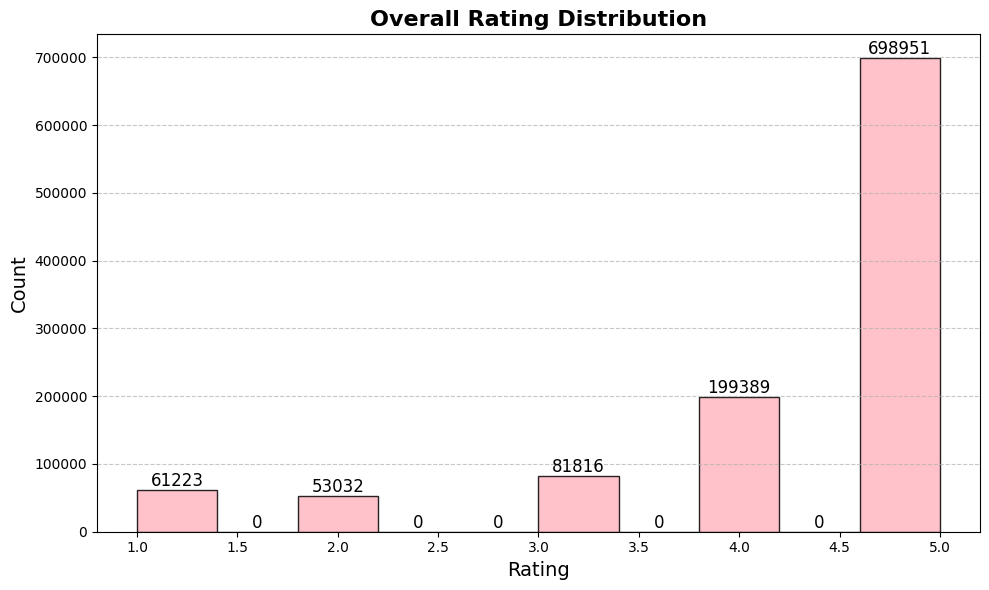

In [48]:
rating_stats = (
    merged
    .groupby("secondary_category")
    ["rating_review"]
    .agg(
        mean_rating="mean",
        median_rating="median",
        mode_rating=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
        review_count="count"
    )
    .reset_index()
)


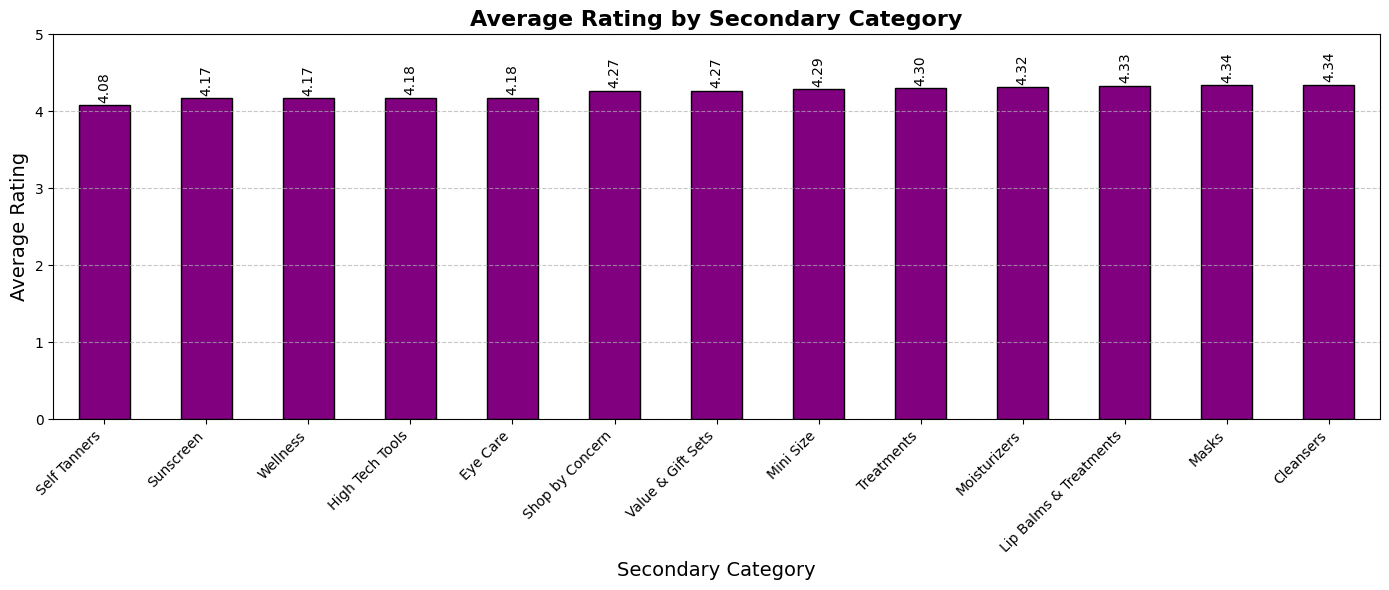

In [49]:
rating_stats["mean_rating"] = rating_stats["mean_rating"].round(2)
rating_stats["median_rating"] = rating_stats["median_rating"].round(2)


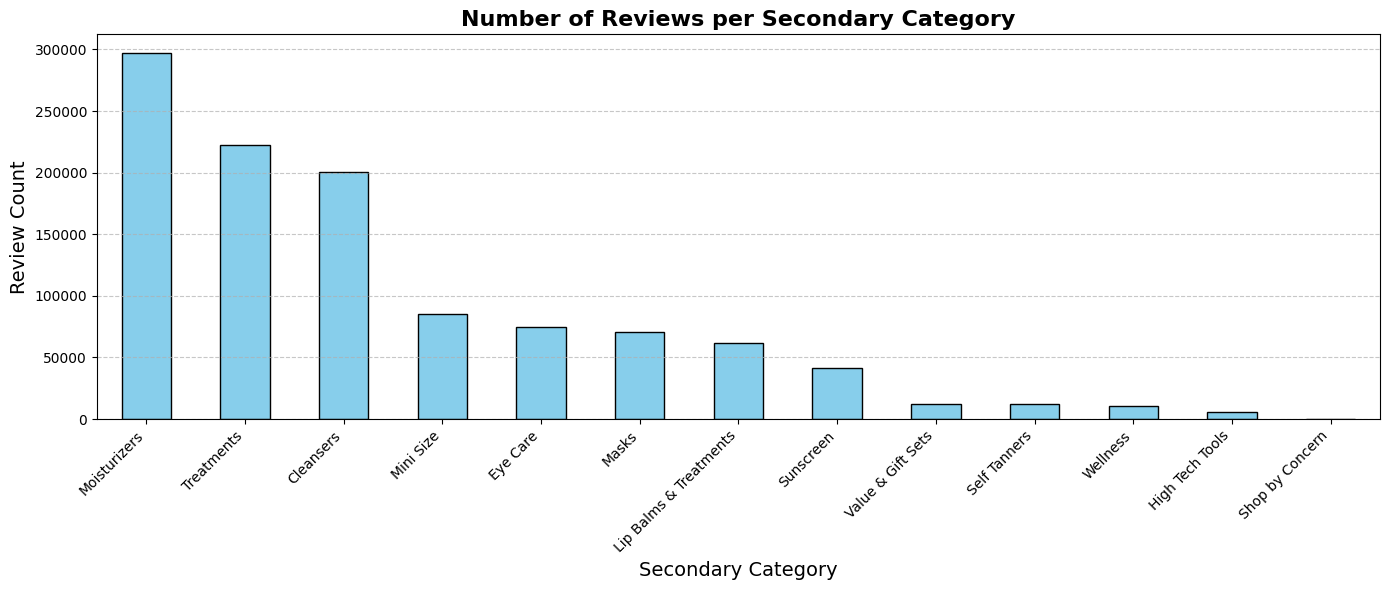

In [50]:
rating_stats.sort_values("review_count", ascending=False).head(20)


In [51]:
# Sanity check 
rating_stats.sample(1)


,secondary_category,mean_rating,median_rating,mode_rating,review_count
6,Moisturizers,4.32,5.0,5.0,297399


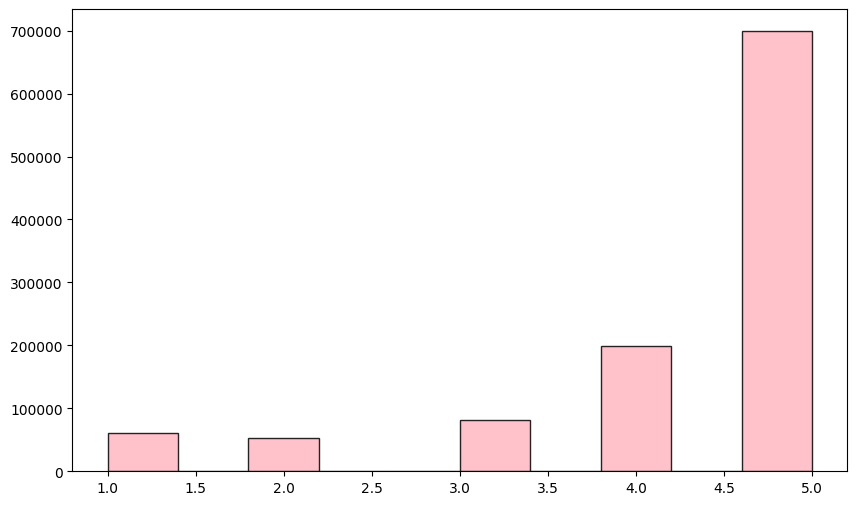

In [52]:
# overall distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    merged["rating_review"],
    bins=10,
    color="#ffb6c1",
    edgecolor="black",
    alpha=0.85
)
...
plt.show()


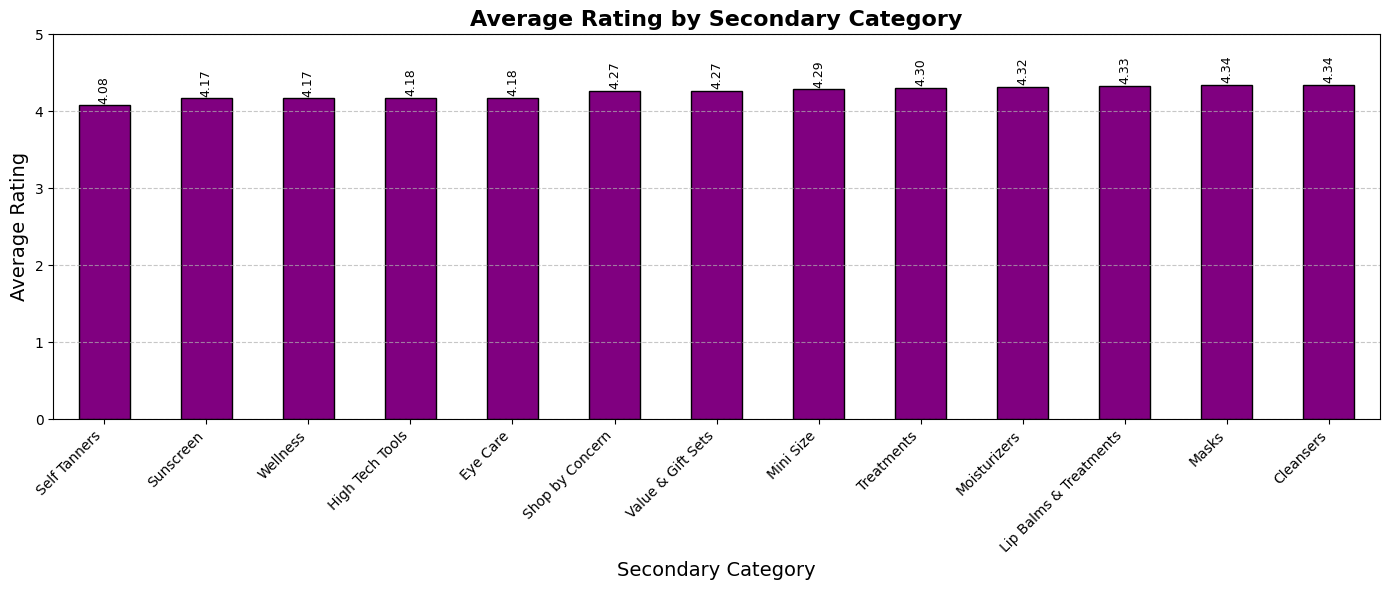

,secondary_category,product_id,product_name_product,avg_rating,review_count,rank
0,Cleansers,P122651,Clarifying Lotion 1,4.515000,200,158.0
1,Cleansers,P122661,7 Day Face Scrub Cream Rinse-Off Formula,4.532099,810,67.0
2,Cleansers,P122718,Exfoliating Face Scrub,4.611715,1195,41.0
3,Cleansers,P122762,Rinse-Off Foaming Cleanser,4.493301,821,66.0
4,Cleansers,P122876,Clarifying Lotion 4,4.384956,226,155.0


In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
avg_ratings_sec = merged.groupby("secondary_category")["rating_review"].mean().sort_values()

ax = avg_ratings_sec.plot(
    kind="bar",
    color="#800080",
    edgecolor="black",
    figsize=(14, 6)
)

ax.set_title("Average Rating by Secondary Category", fontsize=16, fontweight="bold")
ax.set_ylabel("Average Rating", fontsize=14)
ax.set_xlabel("Secondary Category", fontsize=14)
ax.set_ylim(0, 5)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add value labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2, p.get_height() + 0.02),
                ha="center", va="bottom", fontsize=9, rotation=90)

plt.tight_layout()
plt.show()

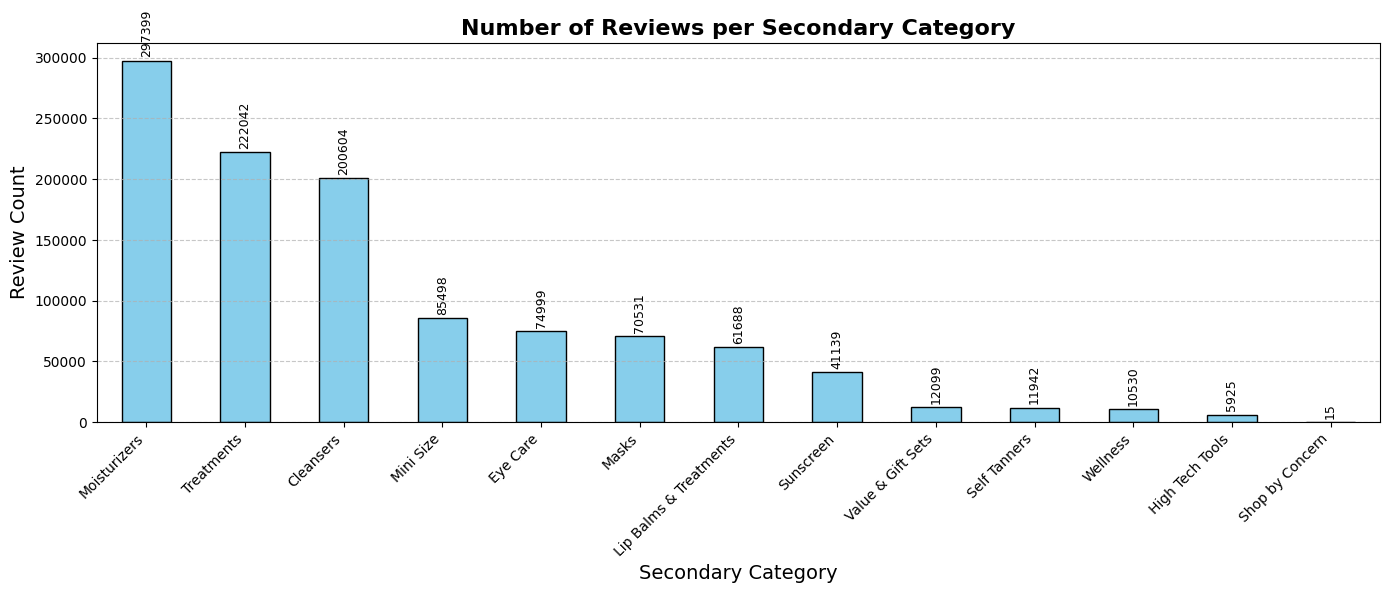

Total products in Top-20 table: 249


,secondary_category,rank,product_name_product,product_id,avg_rating,review_count
0,Cleansers,1,Soy Hydrating Gentle Face Cleanser,P7880,4.362637,8736
1,Cleansers,2,Green Clean Makeup Removing Cleansing Balm,P417238,4.495056,6169
2,Cleansers,2,Green Clean Makeup Meltaway Cleansing Balm Lim...,P450271,4.495056,6169
3,Cleansers,3,Superfood Antioxidant Cleanser,P411387,4.209754,5864
4,Cleansers,4,Pure Skin Face Cleanser,P248404,4.373863,4729
5,Cleansers,5,Daily Microfoliant Exfoliator,P423688,4.695870,4600
6,Cleansers,6,Take The Day Off Cleansing Balm Makeup Remover,P126301,4.529479,4376
7,Cleansers,7,Greek Yoghurt Foaming Cream Cleanser,P456412,4.566651,4186
8,Cleansers,8,Cleansing & Exfoliating Wipes,P409800,4.338285,3837
9,Cleansers,9,Watermelon Glow PHA + BHA Pore-Tight Toner,P458219,4.369166,3321


In [54]:

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
counts = merged["secondary_category"].value_counts(dropna=False)
ax = counts.plot(kind="bar", color="skyblue", edgecolor="black")

ax.set_title("Number of Reviews per Secondary Category", fontsize=16, fontweight="bold")
ax.set_ylabel("Review Count", fontsize=14)
ax.set_xlabel("Secondary Category", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add value labels above bars
offset = max(1, counts.max() * 0.01)
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2, p.get_height() + offset),
                ha="center", va="bottom", fontsize=9, rotation=90)

plt.tight_layout()
plt.show()

In [55]:
import pandas as pd

# 1) Ensure product_stats exists
if 'product_stats' not in globals():
    raise NameError("product_stats not found — run the aggregation cell first")

# 2) Find/normalize avg_rating column
if 'avg_rating' not in product_stats.columns:
    for alt in ('avg_rating','average_rating','mean_rating','avg','rating_mean'):
        if alt in product_stats.columns:
            product_stats = product_stats.rename(columns={alt: 'avg_rating'})
            break
    else:
        if 'merged' in globals():
            product_stats = (
                merged.groupby(['secondary_category','product_id','product_name_product'])['rating_review']
                .agg(avg_rating='mean', review_count='count')
                .reset_index()
            )
        else:
            raise KeyError("avg_rating not found and cannot recompute (no 'merged' available)")

# 3) Coerce numeric, round, and show
product_stats['avg_rating'] = pd.to_numeric(product_stats['avg_rating'], errors='coerce').round(2)
print("Rows:", len(product_stats))
product_stats.head()
top20 = product_stats[product_stats["rank"] <= 20].copy()

print("Total products in Top-20 table:", len(top20))
top20.head(10)


Rows: 2351
Total products in Top-20 table: 249


/var/folders/tf/mcm346y959j6c4rtwh8wm3280000gn/T/ipykernel_37089/1310330659.py:32: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  len(pd.read_csv("archive/reviews_0-250.csv")) +
/var/folders/tf/mcm346y959j6c4rtwh8wm3280000gn/T/ipykernel_37089/1310330659.py:35: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  len(pd.read_csv("archive/reviews_750-1250.csv")) +
/var/folders/tf/mcm346y959j6c4rtwh8wm3280000gn/T/ipykernel_37089/1310330659.py:36: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  len(pd.read_csv("archive/reviews_1250-end.csv"))


Raw review count: 1094411
Merged_clean review count: 1095112
Dropped reviews: -701


In [56]:
import pandas as pd
import numpy as np
from IPython.display import display
import os

# Paths (adjust if you want a different folder)
top20_path = "top20_products_per_secondary_category.csv"
top5_path = "/Users/natashamirchevska/Desktop/sephora project/top5_products_per_secondary_category_n200.csv"

# Load merged (safe fallback if columns missing)
merged = pd.read_csv("merged_clean.csv", engine="python", on_bad_lines="skip")

# Normalize product name column
if "product_name_product" not in merged.columns and "product_name" in merged.columns:
    merged = merged.rename(columns={"product_name": "product_name_product"})

# Normalize rating column
if "rating_review" not in merged.columns and "rating" in merged.columns:
    merged = merged.rename(columns={"rating": "rating_review"})

# Keep needed cols if present
needed = ["secondary_category", "product_id", "product_name_product", "rating_review"]
existing = [c for c in needed if c in merged.columns]
merged = merged[existing].copy()

# Ensure rating numeric and drop missing
merged["rating_review"] = pd.to_numeric(merged["rating_review"], errors="coerce")
merged = merged.dropna(subset=["rating_review"])

# Aggregate to product-level
product_stats = (
    merged
    .groupby(["secondary_category", "product_id", "product_name_product"], dropna=False)["rating_review"]
    .agg(avg_rating="mean", review_count="count")
    .reset_index()
)

# Round avg_rating for presentation
product_stats["avg_rating"] = product_stats["avg_rating"].round(2)

# Rank by review_count (popularity) within secondary_category
product_stats["rank"] = (
    product_stats.groupby("secondary_category")["review_count"]
    .rank("dense", ascending=False)
)

# Prepare and save Top-20 (same format)
top20 = product_stats[product_stats["rank"] <= 20].copy()
top20["rank"] = top20["rank"].astype(int)
top20 = top20.sort_values(["secondary_category", "rank"]).reset_index(drop=True)
top20 = top20[["secondary_category", "rank", "product_name_product", "product_id", "avg_rating", "review_count"]]
top20.to_csv(top20_path, index=False)
print(f"Saved: {top20_path} ({len(top20)} rows)")

# Prepare Top-5 with MIN_REVIEWS=200 and save (exact column order)
MIN_REVIEWS = 200
filtered = product_stats[product_stats["review_count"].fillna(0) >= MIN_REVIEWS].copy()
top5 = (
    filtered
    .sort_values(["secondary_category", "review_count"], ascending=[True, False])
    .groupby("secondary_category", group_keys=False)
    .apply(lambda g: g.head(5))
    .reset_index(drop=True)
)
top5["rank"] = top5.groupby("secondary_category")["review_count"].rank("dense", ascending=False).astype(int)
top5 = top5[["secondary_category", "rank", "product_name_product", "product_id", "avg_rating", "review_count"]]
# Ensure output directory exists
os.makedirs(os.path.dirname(top5_path), exist_ok=True)
top5.to_csv(top5_path, index=False)
print(f"Saved: {top5_path} ({len(top5)} rows)")

# Show samples
print("\nSample Top-20:")
display(top20.head(8))
print("\nSample Top-5 (MIN_REVIEWS=200):")
display(top5.head(8))

Saved: top20_products_per_secondary_category.csv (249 rows)
Saved: /Users/natashamirchevska/Desktop/sephora project/top5_products_per_secondary_category_n200.csv (60 rows)

Sample Top-20:


/var/folders/tf/mcm346y959j6c4rtwh8wm3280000gn/T/ipykernel_37089/2926392217.py:59: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered


,secondary_category,rank,product_name_product,product_id,avg_rating,review_count
0,Cleansers,1,Soy Hydrating Gentle Face Cleanser,P7880,4.36,8736
1,Cleansers,2,Green Clean Makeup Removing Cleansing Balm,P417238,4.50,6169
2,Cleansers,2,Green Clean Makeup Meltaway Cleansing Balm Lim...,P450271,4.50,6169
3,Cleansers,3,Superfood Antioxidant Cleanser,P411387,4.21,5864
4,Cleansers,4,Pure Skin Face Cleanser,P248404,4.37,4729
5,Cleansers,5,Daily Microfoliant Exfoliator,P423688,4.70,4600
6,Cleansers,6,Take The Day Off Cleansing Balm Makeup Remover,P126301,4.53,4376
7,Cleansers,7,Greek Yoghurt Foaming Cream Cleanser,P456412,4.57,4186



Sample Top-5 (MIN_REVIEWS=200):


,secondary_category,rank,product_name_product,product_id,avg_rating,review_count
0,Cleansers,1,Soy Hydrating Gentle Face Cleanser,P7880,4.36,8736
1,Cleansers,2,Green Clean Makeup Removing Cleansing Balm,P417238,4.50,6169
2,Cleansers,2,Green Clean Makeup Meltaway Cleansing Balm Lim...,P450271,4.50,6169
3,Cleansers,3,Superfood Antioxidant Cleanser,P411387,4.21,5864
4,Cleansers,4,Pure Skin Face Cleanser,P248404,4.37,4729
5,Eye Care,1,Moisturizing Eye Bomb with Squalane,P422905,4.46,2966
6,Eye Care,2,Smart Clinical Repair Wrinkle Correcting Eye C...,P479734,4.24,2017
7,Eye Care,3,Avocado Fine Line Eye Cream with Retinol,P447791,4.10,1890
